<a href="https://colab.research.google.com/github/Chandu106/Data_Science_Fundamentals/blob/main/Dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


# **Downloading Dataset from kaggle and uploading through Drive**

In [3]:
import zipfile

zip_ref = zipfile.ZipFile("drive/My Drive/archive (5).zip", "r")
zip_ref.extractall()
zip_ref.close()


In [4]:
!pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio('/content/images/Images', output="output", seed=1337, ratio=(0.7, 0,0.3))

Copying files: 20580 files [00:05, 3513.98 files/s]


In [6]:
import os

# Walk through  directory and list number of files
print("TRAIN---")
for dirpath, dirnames, filenames in os.walk("/content/output/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("TEST---")
for dirpath, dirnames, filenames in os.walk("/content/output/test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


TRAIN---
There are 120 directories and 0 images in '/content/output/train'.
There are 0 directories and 105 images in '/content/output/train/n02108089-boxer'.
There are 0 directories and 122 images in '/content/output/train/n02088238-basset'.
There are 0 directories and 107 images in '/content/output/train/n02101006-Gordon_setter'.
There are 0 directories and 141 images in '/content/output/train/n02095889-Sealyham_terrier'.
There are 0 directories and 120 images in '/content/output/train/n02093754-Border_terrier'.
There are 0 directories and 105 images in '/content/output/train/n02104029-kuvasz'.
There are 0 directories and 109 images in '/content/output/train/n02115641-dingo'.
There are 0 directories and 127 images in '/content/output/train/n02096585-Boston_bull'.
There are 0 directories and 109 images in '/content/output/train/n02109047-Great_Dane'.
There are 0 directories and 136 images in '/content/output/train/n02088364-beagle'.
There are 0 directories and 118 images in '/content/

In [10]:
train_dir="/content/output/train"
test_dir="/content/output/test/"
val_dir = "/content/output/val/"

# **Data Preprocessing**

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
val_data = train_datagen.flow_from_directory(val_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 14355 images belonging to 120 classes.
Found 6225 images belonging to 120 classes.
Found 0 images belonging to 120 classes.


In [35]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound'
 'n02088238-basset' 'n02088364-beagle' 'n02088466-bloodhound'
 'n02088632-bluetick' 'n02089078-black-and-tan_coonhound'
 'n02089867-Walker_hound' 'n02089973-English_foxhound' 'n02090379-redbone'
 'n02090622-borzoi' 'n02090721-Irish_wolfhound'
 'n02091032-Italian_greyhound' 'n02091134-whippet'
 'n02091244-Ibizan_hound' 'n02091467-Norwegian_elkhound'
 'n02091635-otterhound' 'n02091831-Saluki' 'n02092002-Scottish_deerhound'
 'n02092339-Weimaraner' 'n02093256-Staffordshire_bullterrier'
 'n02093428-American_Staffordshire_terrier' 'n02093647-Bedlington_terrier'
 'n02093754-Border_terrier' 'n02093859-Kerry_blue_terrier'
 'n02093991-Irish_terrier' 'n02094114-Norfolk_terrier'
 'n02094258-Norwich_terrier' 'n02094433-Yorkshire_terrier'
 'n02095314-w

# **Helper Function for Plotting loss and Accuracy Graphs**

In [12]:
import matplotlib.pyplot as plt
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# **Transfer Learning Models**

# **TensorFlow Callbacks**

In [45]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


# **Data Preprocessing**

In [46]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/output/train"
test_dir = "/content/output/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")


Training images:
Found 14355 images belonging to 120 classes.
Testing images:
Found 6225 images belonging to 120 classes.


In [47]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [54]:
Inception_V3_url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5"

VGG19_url = "https://tfhub.dev/emilutz/vgg19-block1-conv2-unpooling-encoder/1"

In [49]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

# **INCEPTION MODEL**

In [50]:
# Create model
Inception_model = create_model(Inception_V3_url, num_classes=train_data_10_percent.num_classes)

# Compile model
Inception_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])



In [51]:

# Fit the model
Inception_history = Inception_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files



Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230717-130410
Epoch 1/5
449/449 [==============================] - 135s 254ms/step - loss: 1.0824 - accuracy: 0.7261 - val_loss: 0.8673 - val_accuracy: 0.7671
Epoch 2/5
449/449 [==============================] - 130s 290ms/step - loss: 0.5484 - accuracy: 0.8283 - val_loss: 0.8310 - val_accuracy: 0.7815
Epoch 3/5
449/449 [==============================] - 115s 257ms/step - loss: 0.3796 - accuracy: 0.8742 - val_loss: 0.8703 - val_accuracy: 0.7827
Epoch 4/5
449/449 [==============================] - 103s 229ms/step - loss: 0.2822 - accuracy: 0.9035 - val_loss: 0.8289 - val_accuracy: 0.7961
Epoch 5/5
449/449 [==============================] - 114s 253ms/step - loss: 0.2138 - accuracy: 0.9254 - val_loss: 0.8624 - val_accuracy: 0.7933


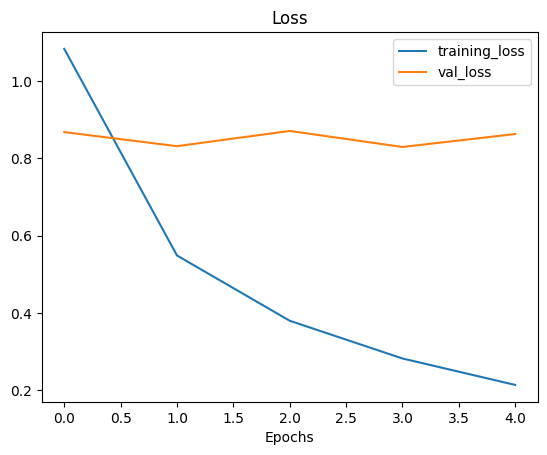

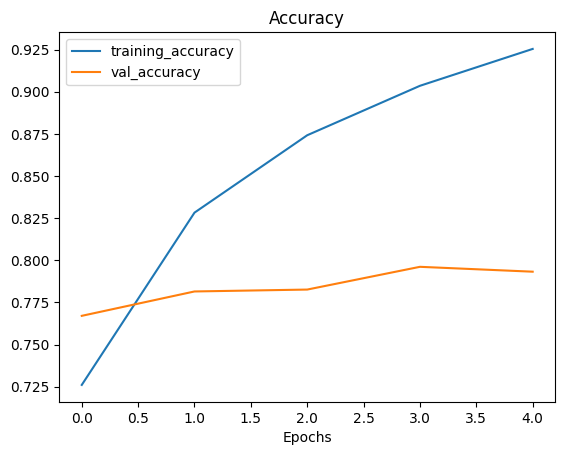

In [52]:
plot_loss_curves(Inception_history)

In [53]:
# Inception summary
Inception_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             21802784  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


# **VGG19 MODEL**

In [55]:
# Create model
VGG19_model = create_model(VGG19_url, num_classes=train_data_10_percent.num_classes)

# Compile model
VGG19_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])



In [56]:

# Fit the model
VGG19_history = VGG19_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files



Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230717-131449
Epoch 1/5


ValueError: ignored

In [ ]:
plot_loss_curves(VGG19_history)

In [ ]:
# Inception summary
VGG19_model.summary()